[참조]
1. https://www.datacamp.com/community/tutorials/decision-tree-classification-python
2. https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


# Load data and store it into pandas DataFrame objects

iris = load_iris()
X = pd.DataFrame(iris.data[:, :], columns = iris.feature_names[:])
y = pd.DataFrame(iris.target, columns =["Species"])


# col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# # load dataset
# pima = pd.read_csv("./dataset/pima-indians-diabetes.csv", header=None, names=col_names)

# #split dataset in features and target variable
# feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
# X = pima[feature_cols] # Features
# y = pima.label # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


In [2]:
# 트리를 그리기 위한 라이브러리 설치 및 패스 설정
## 1.  라이브러리 설치
!pip install graphviz pydotplus 
## 2. https://graphviz.gitlab.io/_pages/Download/Download_windows.html 에서 윈도우용  graphviz stable 버전(graphviz-2.38.msi) 다운로드 및 설치
## 3. 컴퓨터 시스템 속성에서 path 추가  : C:/Program Files (x86)/Graphviz2.38/bin/
## 4. 그래도 안될 경우, 아래 추가 실행
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

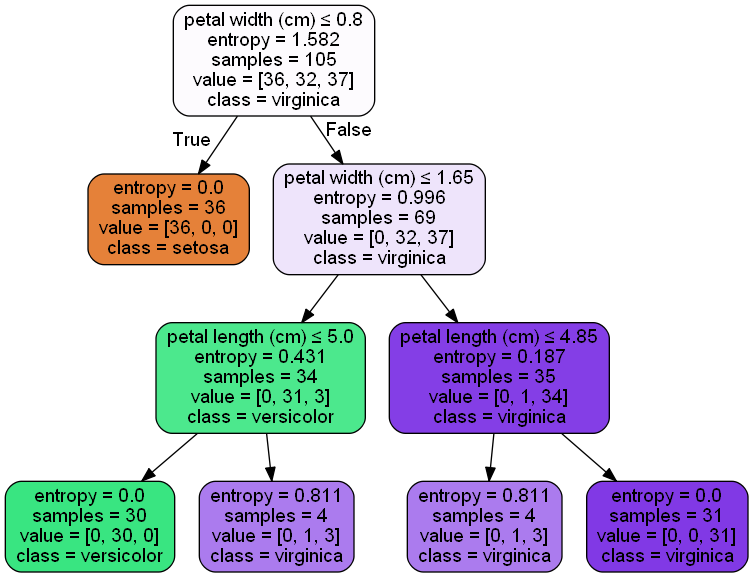

In [3]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = list(X.columns), class_names=iris.target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('iris.png')
Image(graph.create_png())

In [4]:
# Making a Prediction On a New Sample

sample_one_pred = int(clf.predict([[5, 5, 1, 3]]))
sample_two_pred = int(clf.predict([[5, 5, 2.6, 1.5]]))
print(f"The first sample most likely belongs a {iris.target_names[sample_one_pred]} flower.")
print(f"The second sample most likely belongs a {iris.target_names[sample_two_pred]} flower.")

The first sample most likely belongs a virginica flower.
The second sample most likely belongs a versicolor flower.
